In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.sparse as sps


# Input data files are available in the read-only "./input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [2]:
RM_train=pd.read_csv('./input/data_train.csv')
R_test=pd.read_csv('./input/data_target_users_test.csv')
URM=pd.read_csv('./input/data_train.csv')
URM_tuples = [tuple(x) for x in URM.to_numpy()]

userList, itemList, ratingList = zip(*URM_tuples)

userList = list(userList)
userList=np.array(userList,dtype=np.int64)
itemList = list(itemList)
itemList=np.array(itemList,dtype=np.int64)

ratingList = list(ratingList)                        #not needed
ratingList=np.array(ratingList,dtype=np.int64)       #not needed

URM_all = sps.coo_matrix((ratingList, (userList, itemList)))
URM_all = URM_all.tocsr()

In [3]:
userList_unique = list(set(userList))
itemList_unique = list(set(itemList))

numUsers = len(userList_unique)
numItems = len(itemList_unique)

numberInteractions= len(URM_tuples)
print ("Number of items\t {}, Number of users\t {}".format(numItems, numUsers))
print("Number of Intraction \t {}" .format(numberInteractions))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemList_unique), max(userList_unique)))
print ("Average interactions per user {:.2f}".format(numberInteractions/numUsers))
print ("Average interactions per item {:.2f}\n".format(numberInteractions/numItems))

print ("Sparsity {:.2f} %".format((1-float(numberInteractions)/(numItems*numUsers))*100))

Number of items	 24896, Number of users	 7947
Number of Intraction 	 113268
Max ID items	 25974, Max Id users	 7946

Average interactions per user 14.25
Average interactions per item 4.55

Sparsity 99.94 %


In [4]:
ICM = pd.read_csv('./input/data_ICM_title_abstract.csv')
ICM_tuples = [tuple(x) for x in ICM.to_numpy()]
itemList_icm, featureList_icm, scoreList_icm = zip(*ICM_tuples)

itemList_icm = list(itemList_icm)
itemList_icm = np.array(itemList_icm,dtype=np.int64)

featureList_icm = list(featureList_icm)
featureList_icm = np.array(featureList_icm,dtype=np.int64)

scoreList_icm = list(scoreList_icm)
scoreList_icm = np.array(scoreList_icm,dtype=np.float64)

ICM_all = sps.coo_matrix((scoreList_icm, (itemList_icm, featureList_icm)))

ICM_all

<25975x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 490691 stored elements in COOrdinate format>

In [5]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.80)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [6]:
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender

x_tick = [10, 50, 100, 200, 500]
MAP_per_k = []

for topK in x_tick:
    recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
    recommender.fit(shrink=0.0, topK=topK)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_k.append(result_dict[10]["MAP"])
    
print(MAP_per_k)

ItemKNNCBFRecommender: URM Detected 229 (2.88 %) cold users.
ItemKNNCBFRecommender: URM Detected 3991 (15.36 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1615.76 column/sec, elapsed time 0.27 min
EvaluatorHoldout: Processed 5646 ( 100.00% ) in 2.96 sec. Users per second: 1905
ItemKNNCBFRecommender: URM Detected 229 (2.88 %) cold users.
ItemKNNCBFRecommender: URM Detected 3991 (15.36 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1699.28 column/sec, elapsed time 0.25 min
EvaluatorHoldout: Processed 5646 ( 100.00% ) in 2.90 sec. Users per second: 1945
ItemKNNCBFRecommender: URM Detected 229 (2.88 %) cold users.
ItemKNNCBFRecommender: URM Detected 3991 (15.36 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1668.90 column/sec, elapsed time 0.26 min
EvaluatorHoldout: Processed 5646 ( 100.00% ) in 3

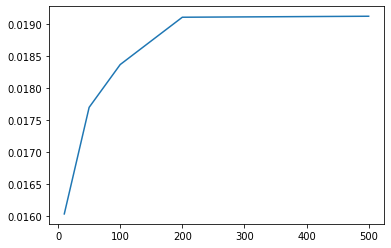

In [7]:
import matplotlib.pyplot as pyplot

pyplot.plot(x_tick, MAP_per_k)
pyplot.show()


In [8]:
x_tick = [5,10,15,20]
MAP_per_shrinkage = []

for shrink in x_tick:
    
    recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
    recommender.fit(shrink=shrink, topK=100)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_shrinkage.append(result_dict[10]["MAP"])
    
print(MAP_per_shrinkage)

ItemKNNCBFRecommender: URM Detected 229 (2.88 %) cold users.
ItemKNNCBFRecommender: URM Detected 3991 (15.36 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1592.91 column/sec, elapsed time 0.27 min
EvaluatorHoldout: Processed 5646 ( 100.00% ) in 3.11 sec. Users per second: 1818
ItemKNNCBFRecommender: URM Detected 229 (2.88 %) cold users.
ItemKNNCBFRecommender: URM Detected 3991 (15.36 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1568.28 column/sec, elapsed time 0.28 min
EvaluatorHoldout: Processed 5646 ( 100.00% ) in 3.01 sec. Users per second: 1876
ItemKNNCBFRecommender: URM Detected 229 (2.88 %) cold users.
ItemKNNCBFRecommender: URM Detected 3991 (15.36 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1678.11 column/sec, elapsed time 0.26 min
EvaluatorHoldout: Processed 5646 ( 100.00% ) in 3

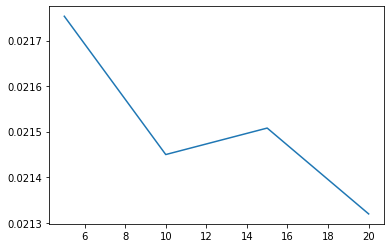

In [9]:
pyplot.plot(x_tick, MAP_per_shrinkage)
pyplot.show()

In [10]:
recommender = ItemKNNCBFRecommender(URM_all, ICM_all)
recommender.fit(shrink=10, topK=100)

ItemKNNCBFRecommender: URM Detected 1079 (4.15 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1671.64 column/sec, elapsed time 0.26 min


In [11]:
userTestList = [x for x in R_test.to_numpy()]
userTestList = zip(*userTestList)
userTestList = [list(a) for a in userTestList][0]

In [30]:
recoms = recommender.recommend(userTestList, cutoff=10)

In [29]:
recomList = []
for i in range(len(recoms)):
    recomList.append(' '.join(str(e) for e in recoms[i]))
# print(recoms)

res = {"user_id": userTestList, "item_list": recomList}
result = pd.DataFrame(res, columns= ['user_id', 'item_list'])

result.to_csv ('outputs/cbfv1.csv', index = False, header=True)

[7908, 24573, 13884, 22445, 3301, 13005, 9772, 14168, 413, 2890]
[12119, 6198, 12561, 21578, 10179, 25619, 5115, 20310, 8097, 8707]
[14353, 5593, 8877, 1565, 18003, 16333, 22865, 21613, 4401, 1353]
[519, 13592, 12157, 16086, 4750, 6253, 17510, 9462, 17174, 825]
[5191, 13864, 7704, 12587, 17097, 18867, 1716, 23113, 24693, 25478]
[16172, 17819, 22517, 9301, 15150, 25285, 23328, 19150, 10271, 20473]
[426, 24801, 3569, 8041, 21470, 25930, 24033, 10355, 11295, 19445]
[17332, 4314, 8104, 13840, 20620, 11300, 18352, 10195, 10025, 20104]
[14059, 9316, 1014, 18148, 13345, 24317, 11991, 4044, 13091, 3502]
[3699, 1376, 15782, 5741, 8890, 5045, 17092, 3742, 16691, 23002]
[12906, 3556, 24567, 14968, 4413, 1302, 21303, 4462, 5478, 3168]
[16175, 4661, 3220, 298, 12133, 9010, 21948, 13119, 9416, 3284]
[9054, 5226, 20159, 7322, 6235, 12676, 13774, 2591, 10021, 4793]
[14993, 18028, 13631, 3067, 25743, 21966, 10278, 23339, 12123, 5257]
[20644, 555, 18499, 25649, 3641, 23426, 21541, 8999, 5436, 22871]
[22